##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
!pip install plotly
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

##Dataset Collection
###ECG500 Dataset

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
!wget https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip

--2025-01-25 22:13:50--  https://www.timeseriesclassification.com/aeon-toolkit/ECG5000.zip
Resolving www.timeseriesclassification.com (www.timeseriesclassification.com)... 212.78.75.243
Connecting to www.timeseriesclassification.com (www.timeseriesclassification.com)|212.78.75.243|:443... connected.
HTTP request sent, awaiting response... 200 
Length: 10614407 (10M) [application/zip]
Saving to: ‘ECG5000.zip’

ECG5000.zip         100%[===================>]  10.12M  12.9MB/s    in 0.8s    

2025-01-25 22:13:51 (12.9 MB/s) - ‘ECG5000.zip’ saved [10614407/10614407]



##Data Transformation

In [4]:
with ZipFile('ECG5000.zip', 'r') as zip :
   zip.extractall(path='/content/dataset')

In [5]:
df1 = pd.read_csv('/content/dataset/ECG5000_TRAIN.txt', sep='\s+', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456


In [6]:
df1.shape

(500, 141)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 550.9 KB


In [8]:
df2 = pd.read_csv('/content/dataset/ECG5000_TEST.txt', sep='\s+', header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,3.690844,0.711414,-2.114091,-4.141007,-4.574472,-3.431909,-1.950791,-1.107067,-0.632322,...,-0.032477,0.022847,0.188937,0.480932,0.629250,0.577291,0.665527,1.035997,1.492287,-1.905073
1,1.0,-1.348132,-3.996038,-4.226750,-4.251187,-3.477953,-2.228422,-1.808488,-1.534242,-0.779861,...,0.937984,1.570938,1.591394,1.549193,1.193077,0.515134,0.126274,0.267532,1.071148,-1.164009
2,1.0,1.024295,-0.590314,-1.916949,-2.806989,-3.527905,-3.638675,-2.779767,-2.019031,-1.980754,...,0.368820,0.443502,0.827582,1.237007,1.235121,1.738103,1.800767,1.816301,1.473963,1.389767
3,1.0,0.545657,-1.014383,-2.316698,-3.634040,-4.196857,-3.758093,-3.194444,-2.221764,-1.588554,...,0.894638,0.777530,1.119240,0.902984,0.554098,0.497053,0.418116,0.703108,1.064602,-0.044853
4,1.0,0.661133,-1.552471,-3.124641,-4.313351,-4.017042,-3.005993,-1.832411,-1.503886,-1.071705,...,1.416582,1.280823,1.494315,1.618764,1.447449,1.238577,1.749692,1.986803,1.422756,-0.357784


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 4.8 MB


In [10]:
df = pd.concat([df1, df2])
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
3092,2.0,-1.732100,-2.299038,-2.516311,-3.371911,-3.308306,-3.344125,-2.740114,-2.082606,-1.500686,...,1.538239,1.466317,1.094369,0.775433,0.263445,-0.065608,-1.151682,-1.613036,-2.065390,-1.126148
545,1.0,-1.036630,-0.586544,-3.202044,-5.001676,-4.574732,-4.052679,-2.680084,-1.812491,-1.110067,...,-0.718057,-0.783063,-0.671135,-0.296081,0.360343,0.307955,0.072506,-0.370814,0.151693,0.358463
713,1.0,0.519990,-2.181712,-3.588278,-4.434175,-4.581877,-3.633170,-2.033741,-1.279460,-1.177222,...,0.657710,1.442181,1.333563,0.908340,0.737729,0.126501,-0.549987,-0.722011,0.155006,-1.286132
2532,1.0,1.055882,0.324238,-1.221153,-2.221034,-3.146072,-3.430421,-2.804038,-1.952079,-1.655294,...,0.387576,0.841028,1.086623,0.748508,0.715252,0.389908,0.249023,0.318490,0.861723,1.355128
885,1.0,2.455037,1.155657,-0.710172,-2.294125,-3.868154,-4.095241,-3.652476,-2.434062,-1.509079,...,0.230762,0.074142,-0.001652,-0.081088,-0.093691,0.201278,0.726250,1.221510,1.641904,0.356605


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4499
Columns: 141 entries, 0 to 140
dtypes: float64(141)
memory usage: 5.4 MB


In [12]:
df = df.add_prefix('c')
df.sample(5)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
1627,1.0,0.643817,-1.836610,-3.477879,-3.839223,-3.794019,-3.235807,-2.183009,-1.659536,-1.508745,...,0.998111,1.038810,0.920761,1.059359,1.120710,1.109597,1.283891,1.588931,2.241162,0.996017
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
214,1.0,-0.144682,-1.517607,-2.401121,-3.374271,-4.101602,-3.789194,-2.532917,-1.676556,-1.843619,...,1.549604,1.798808,1.183355,0.636879,-0.212105,-1.120089,-1.390453,-1.350474,-0.546036,-0.203869
3393,2.0,-1.234853,-1.887861,-1.804830,-2.469917,-2.592924,-2.613288,-2.646591,-2.335102,-1.907109,...,-2.393408,-3.011080,-3.539384,-3.637295,-3.199756,-2.559096,-1.505431,-0.599754,-0.640063,0.373551
3763,2.0,0.619884,0.044170,-0.490190,-1.081955,-1.620685,-2.106545,-2.373227,-2.297841,-2.037800,...,-2.094430,-2.576838,-3.021699,-3.379226,-3.673747,-3.800493,-3.215241,-2.413645,-1.929517,-0.449560


In [13]:
df['c0'].value_counts()

,count
c0,
1.0,2919
2.0,1767
4.0,194
3.0,96
5.0,24


##Importing Tensorflow Functions

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Model

In [15]:
x_train, x_test, y_train, y_test = train_test_split(df.values, df.values[:,0:1], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
data_scaled = scaler.fit(x_train)

In [16]:
x_train_scaled = data_scaled.transform(x_train)
x_test_scaled = data_scaled.transform(x_test)

In [17]:
x_train_scaled

array([[0.25      , 0.53813398, 0.59585633, ..., 0.11775889, 0.0569781 ,
        0.17124168],
       [0.25      , 0.53857438, 0.58850356, ..., 0.26561097, 0.25063599,
        0.22736195],
       [0.        , 0.317557  , 0.18654775, ..., 0.71455568, 0.70718614,
        0.51703033],
       ...,
       [0.        , 0.45442466, 0.35540716, ..., 0.77837157, 0.74294265,
        0.50709418],
       [0.25      , 0.40345124, 0.39132017, ..., 0.4868497 , 0.50193227,
        0.47770011],
       [0.        , 0.37134117, 0.25002207, ..., 0.71048947, 0.65626497,
        0.35023474]])

In [18]:
normal_train = pd.DataFrame(x_train_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
annomaly_train = pd.DataFrame(x_train_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [19]:
normal_test = pd.DataFrame(x_test_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
annomaly_test = pd.DataFrame(x_test_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

##Representation of Difference b/w Normal and Abnormal Scale Values

In [22]:
feature1_idx = 0
feature2_idx = 50
feature3_idx = 100

fig_normal = go.Figure(data=[go.Scatter3d(
    x=normal_train[:, feature1_idx],
    y=normal_train[:, feature2_idx],
    z=normal_train[:, feature3_idx],
    mode='markers',
    marker=dict(
        size=5,
        color='blue',
        colorscale='Viridis',
        opacity=0.8
    )
)])
fig_normal.update_layout(title='Normal ECG Data',
                  scene=dict(
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2',
                      zaxis_title='Feature 3'),
                      width=600,
                      height=500)

fig_normal.show()

In [23]:
fig_anomaly = go.Figure(data=[go.Scatter3d(
    x=annomaly_train[:, feature1_idx],
    y=annomaly_train[:, feature2_idx],
    z=annomaly_train[:, feature3_idx],
    mode='markers',
    marker=dict(
        size=5,
        color='red',
        colorscale='Viridis',
        opacity=0.8
    )
)])

fig_anomaly.update_layout(title='Anomaly ECG Data',
                  scene=dict(
                      xaxis_title='Feature 1',
                      yaxis_title='Feature 2',
                      zaxis_title='Feature 3'),
                  width=600,
                  height=500)
fig_anomaly.show()

In [24]:
normal_sample = normal_train[0]
anomaly_sample = annomaly_train[0]

fig = go.Figure(data=[go.Scatter3d(
    x=list(range(len(normal_sample))),
    y=normal_sample,
    z=[0] * len(normal_sample),
    mode='markers',
    name='Normal'
),
go.Scatter3d(
    x=list(range(len(anomaly_sample))),
    y=anomaly_sample,
    z=[1] * len(anomaly_sample),
    mode='markers',
    name='Anomaly'
)])

fig.update_layout(title='Normal vs Anomaly ECG Signals',
                  scene=dict(xaxis_title='Time', yaxis_title='Amplitude', zaxis_title='Category'), width=700, height=600)

fig.show()


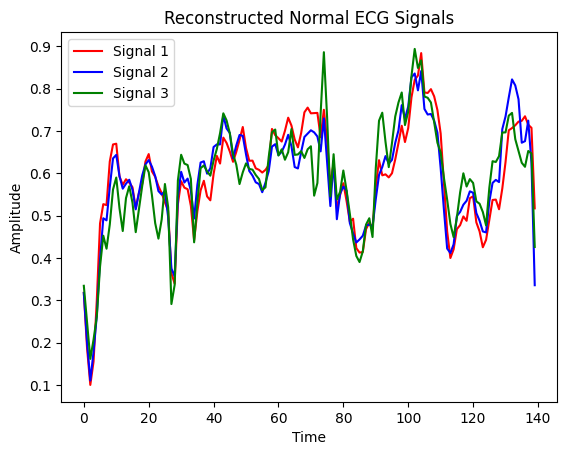

In [28]:
plt.plot(normal_train[0], color='red', label='Signal 1')  # Red color for the first signal
plt.plot(normal_train[1], color='blue', label='Signal 2')  # Blue color for the second signal
plt.plot(normal_train[2], color='green', label='Signal 3')  # Green color for the third signal

# Adding title and labels
plt.title('Reconstructed Normal ECG Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

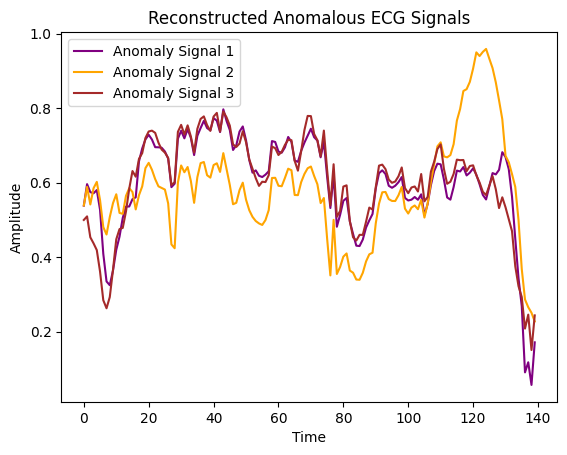

In [29]:
import matplotlib.pyplot as plt

# Plot anomalous reconstructed ECG signals with different colors
plt.plot(annomaly_train[0], color='purple', label='Anomaly Signal 1')  # Purple color for the first anomalous signal
plt.plot(annomaly_train[1], color='orange', label='Anomaly Signal 2')  # Orange color for the second anomalous signal
plt.plot(annomaly_train[2], color='brown', label='Anomaly Signal 3')   # Brown color for the third anomalous signal

# Adding title and labels
plt.title('Reconstructed Anomalous ECG Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()


##Autoencoder Model Architecture

In [30]:
class AutoEncoder(Model) :
  def __init__(self) :
    super(AutoEncoder, self).__init__()
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu')])

    self.decoder = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(140,activation='sigmoid')])

  def call(self, x) :
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [31]:
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                                  patience=2,
                                                  mode = 'min')
model.compile(optimizer = 'adam', loss = 'mae')

In [32]:
history = model.fit(normal_train, normal_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_train_scaled[:,1:], x_train_scaled[:,1:]),
                    shuffle=True,
                    callbacks=[early_stopping]
                    )

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.1230 - val_loss: 0.1018
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0783 - val_loss: 0.0800
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0521 - val_loss: 0.0756
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0468 - val_loss: 0.0751
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0465 - val_loss: 0.0755
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - val_loss: 0.0746
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0461 - val_loss: 0.0746
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0464 - val_loss: 0.0745
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - val_loss: 0.0744
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0469 - val_loss: 0.0739
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0460 - val_loss: 0.0736
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0463 - val_l

##Model Summary

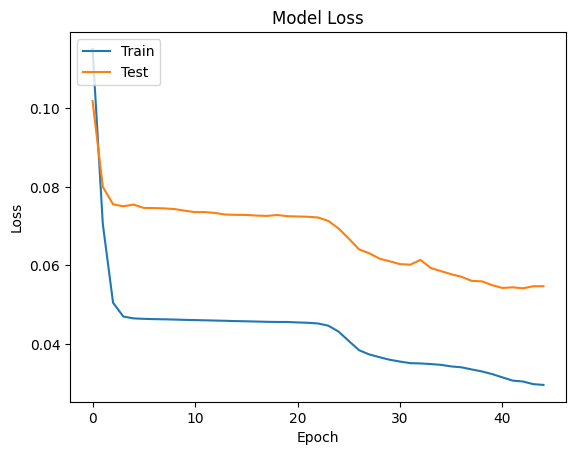

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [34]:
model.summary()

Model: "auto_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 8)                   │          11,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 140)                 │          11,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 71,006 (277.37 KB)

 Trainable params: 23,668 (92.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 47,338 (184.92 KB)

In [35]:
encoder = model.encoder(normal_test).numpy()
decoder = model.decoder(encoder).numpy()

In [36]:
encoder.shape

(586, 8)

In [37]:
decoder.shape

(586, 140)

##Reconstruction of the values to Normal Scales

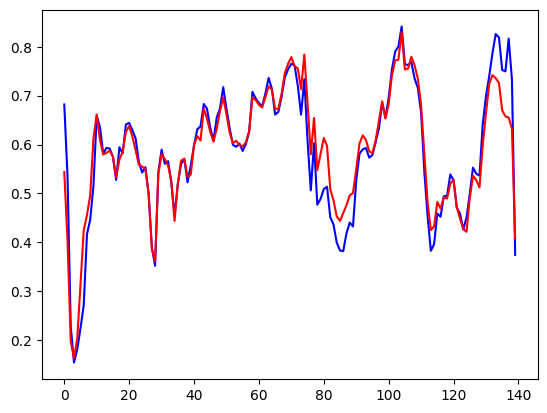

In [38]:
plt.plot(normal_test[0],'b')
plt.plot(decoder[0],'r')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(array([ 5., 20., 38., 62., 67., 71., 58., 40., 44., 25., 24., 21., 16.,
        21., 15.,  9.,  6.,  9.,  4.,  6.,  5.,  4.,  1.,  2.,  1.,  1.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,  2.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.01370321, 0.01575448, 0.01780575, 0.01985703, 0.0219083 ,
        0.02395958, 0.02601085, 0.02806213, 0.0301134 , 0.03216467,
        0.03421595, 0.03626722, 0.0383185 , 0.04036977, 0.04242105,
        0.04447232, 0.04652359, 0.04857487, 0.05062614, 0.05267742,
        0.05472869, 0.05677997, 0.05883124, 0.06088251, 0.06293379,
        0.06498506, 0.06703634, 0.06908761, 0.07113889, 0.07319016,
        0.07524143, 0.07729271, 0.07934398, 0.08139526, 0.08344653,
        0.08549781, 0.08754908, 0.08960035, 0.09165163, 0.0937029 ,
        0.09575418, 0.09780545, 0.09985673, 0.101908  , 0.10395928,
        0.10601055, 0.10806182, 0.1101131 , 0.11216437, 0.11421565,
        0.11626692]),
 <BarContainer

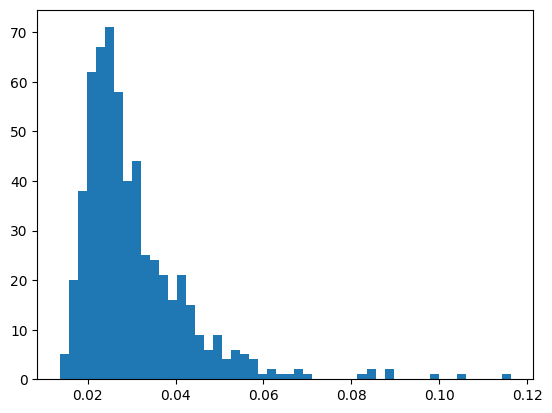

In [39]:
reconstruction_normal = model.predict(normal_test)
train_loss_normal = tf.keras.losses.mae(reconstruction_normal, normal_test)

plt.hist(train_loss_normal, bins=50)

In [40]:
np.mean(train_loss_normal)

0.03047571680415491

In [41]:
np.std(train_loss_normal)

0.012489426218256177

In [42]:
threshold = np.mean(train_loss_normal) + 2*np.std(train_loss_normal)
threshold

0.05545456924066726

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  3.,  6.,  5.,  7.,
         4., 14., 28., 35., 49., 47., 52., 36., 45., 37., 16., 11.,  4.,
         1.,  0.,  1.,  1.,  1.,  0.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.02433664, 0.02770915, 0.03108167, 0.03445418, 0.0378267 ,
        0.04119921, 0.04457173, 0.04794424, 0.05131676, 0.05468927,
        0.05806179, 0.0614343 , 0.06480682, 0.06817933, 0.07155185,
        0.07492436, 0.07829688, 0.08166939, 0.08504191, 0.08841442,
        0.09178694, 0.09515945, 0.09853197, 0.10190448, 0.105277  ,
        0.10864951, 0.11202203, 0.11539454, 0.11876706, 0.12213957,
        0.12551209, 0.1288846 , 0.13225712, 0.13562963, 0.13900215,
        0.14237466, 0.14574718, 0.14911969, 0.15249221, 0.15586472,
        0.15923724, 0.16260975, 0.16598227, 0.16935478, 0.1727273 ,
        0.17609981, 0.17947233, 0.18284484, 0.18621736, 0.18958987,
        0.19296239]),
 <BarContainer

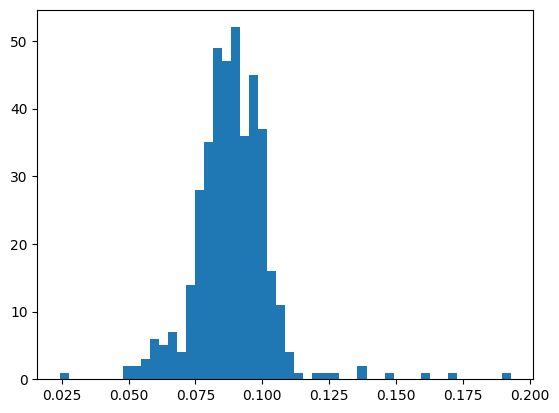

In [43]:
reconstruction_annomaly = model.predict(annomaly_test)
train_loss_annomaly = tf.keras.losses.mae(reconstruction_annomaly, annomaly_test)

plt.hist(train_loss_annomaly, bins=50)

In [44]:
import numpy as np
import tensorflow as tf
import plotly.graph_objects as go

def calculate_accuracy_and_plot(train_loss_annomaly, threshold, normal_test, annomaly_test):

    predictions = (train_loss_annomaly.numpy() > threshold).astype(int)
    accuracy = np.sum(predictions) / len(predictions) * 100


    fig = go.Figure()

    fig.add_trace(go.Scatter3d(
        x=normal_test[:, 0],
        y=normal_test[:, 1],
        z=train_loss_normal,
        mode='markers',
        name='Normal',
        marker=dict(
            size=5,
            color=train_loss_normal,
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    fig.add_trace(go.Scatter3d(
        x=annomaly_test[:, 0],
        y=annomaly_test[:, 1],
        z=train_loss_annomaly.numpy(),
        mode='markers',
        name='Anomaly',
        marker=dict(
            size=5,
            color=train_loss_annomaly.numpy(),
            colorscale='Viridis',
            opacity=0.8
        )
    ))

    x_plane = np.linspace(np.min(normal_test[:, 0]), np.max(normal_test[:, 0]), 10)
    y_plane = np.linspace(np.min(normal_test[:, 1]), np.max(normal_test[:, 1]), 10)
    z_plane = np.full((10, 10), threshold)
    fig.add_surface(x=x_plane, y=y_plane, z=z_plane, showscale=False, opacity=0.5, name='Threshold')

    fig.update_layout(title="Accuracy: {:.2f}%".format(accuracy),
                      scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Reconstruction Error'),
                      width=800, height=600)

    fig.show()

calculate_accuracy_and_plot(train_loss_annomaly, threshold, normal_test, annomaly_test)

In [45]:
np.mean(train_loss_annomaly)

0.08881376649222349

In [46]:
np.std(train_loss_annomaly)

0.014858463045613543

In [47]:
tf.math.less(train_loss_normal, threshold)

<tf.Tensor: shape=(586,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  Tr

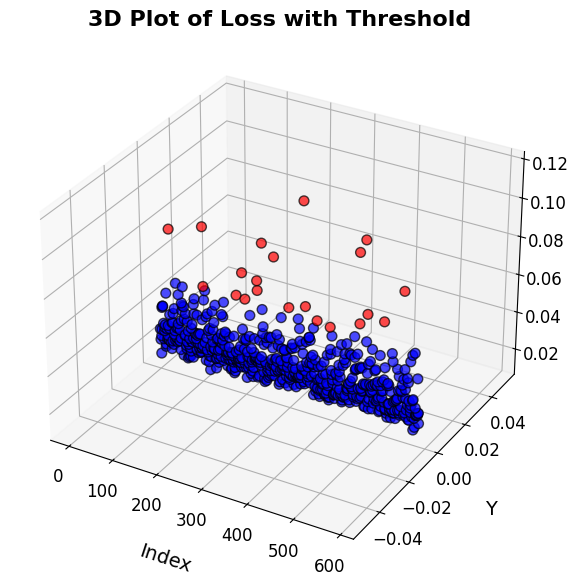

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

fig = plt.figure(figsize=(10, 7))  # Increase figure size for better clarity
ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(train_loss_normal))
y = np.zeros_like(x)
z = train_loss_normal

# Adjusting colors: Use a colormap for a smoother gradient
colors = ['blue' if val else 'red' for val in tf.math.less(train_loss_normal, threshold)]

# Scatter plot with customized markers and size
ax.scatter(x, y, z, c=colors, marker='o', s=50, edgecolors='k', alpha=0.7)

# Improving axis labels with larger fonts
ax.set_xlabel('Index', fontsize=14, labelpad=15)
ax.set_ylabel('Y', fontsize=14, labelpad=15)
ax.set_zlabel('Loss', fontsize=14, labelpad=15)

# Title with increased font size and bold text
plt.title('3D Plot of Loss with Threshold', fontsize=16, fontweight='bold')

# Adding grid for better readability
ax.grid(True)

# Customizing ticks and tick labels
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()


<Axes: >

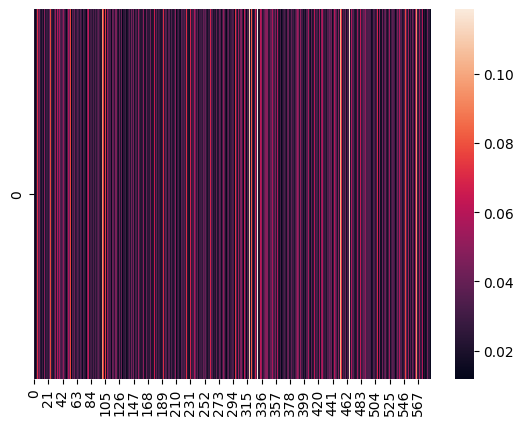

In [ ]:
import seaborn as sns
train_loss_normal_2d = tf.reshape(train_loss_normal, [1, -1])
sns.heatmap(train_loss_normal_2d)

In [50]:
preds = tf.math.less(train_loss_normal, threshold)

In [51]:
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=565>

In [52]:
preds.shape

TensorShape([586])

In [53]:
preds_annnomaly = tf.math.greater(train_loss_annomaly, threshold)
tf.math.count_nonzero(preds_annnomaly)

<tf.Tensor: shape=(), dtype=int64, numpy=409>

In [54]:
preds_annnomaly.shape

TensorShape([414])

##Representation of True Values and False Values

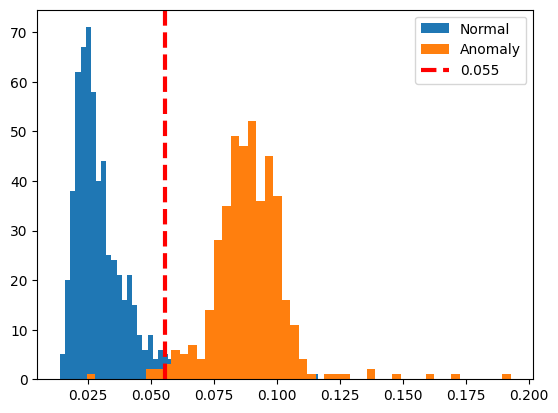

In [55]:
plt.hist(train_loss_normal, bins=50, label='Normal')
plt.hist(train_loss_annomaly, bins=50, label='Anomaly')
plt.axvline(threshold, color='r',linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [56]:
def plot_3d_loss(train_loss_normal, train_loss_anomaly):

  x = np.arange(train_loss_normal.shape[0])

  fig_normal = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=train_loss_normal.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color='blue',
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_normal.update_layout(title='Reconstruction Loss for Normal Data',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Reconstruction Loss'),
                        width=600,
                        height=500)

  x = np.arange(train_loss_anomaly.shape[0])

  fig_anomaly = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=train_loss_anomaly.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color='red',
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_anomaly.update_layout(title='Reconstruction Loss for Anomaly Data',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Reconstruction Loss'),
                        width=600,
                        height=500)

  fig_normal.show()
  fig_anomaly.show()

plot_3d_loss(train_loss_normal, train_loss_annomaly)

In [59]:
def plot_3d_loss_diff(train_loss_normal, train_loss_anomaly):

  min_length = min(train_loss_normal.shape[0], train_loss_anomaly.shape[0])
  difference = train_loss_anomaly[:min_length] - train_loss_normal[:min_length]

  x = np.arange(min_length)

  fig_diff = go.Figure(data=[go.Scatter3d(
      x=x,
      y=np.zeros_like(x),
      z=difference.numpy().flatten(),
      mode='markers',
      marker=dict(
          size=5,
          color=difference.numpy().flatten(),
          colorscale='Viridis',
          opacity=0.8
      )
  )])

  fig_diff.update_layout(title='Difference in Reconstruction Loss (Anomaly - Normal)',
                    scene=dict(
                        xaxis_title='Sample Index',
                        yaxis_title='Feature Index',
                        zaxis_title='Loss Difference'),
                        width=700,
                        height=600)

  fig_diff.show()

plot_3d_loss_diff(train_loss_normal, train_loss_annomaly)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Confusion Matrix:
[[565  21]
 [  5 409]]

Classification Report:
              precision    recall  f1-score   support

      Normal       0.99      0.96      0.98       586
     Anomaly       0.95      0.99      0.97       414

    accuracy                           0.97      1000
   macro avg       0.97      0.98      0.97      1000
weighted avg       0.97      0.97      0.97      1000



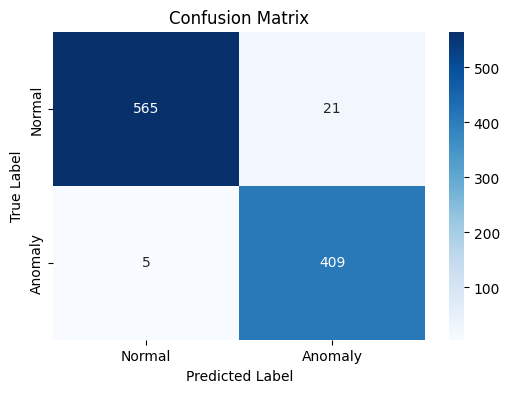

In [60]:
## Confusion Matrix Implementation

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

y_true = (y_test.flatten() > 1.0).astype(int)

reconstruction_test = model.predict(x_test_scaled[:, 1:])  # Predict on test set features
# Calculate Mean Absolute Error (MAE) for each sample
mae_test = tf.keras.losses.mae(reconstruction_test, x_test_scaled[:, 1:]).numpy()
# Apply threshold to determine anomalies
y_pred = (mae_test > threshold).astype(int)

# Step 3: Compute Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Step 4: Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Anomaly']))

# Step 5: Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Anomaly'],
            yticklabels=['Normal', 'Anomaly'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

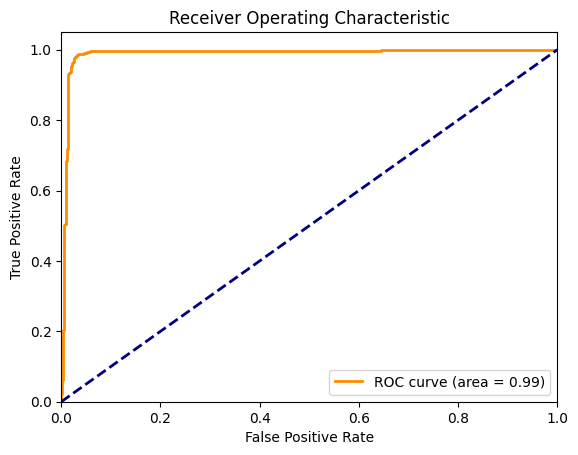

In [61]:
  from sklearn.metrics import roc_curve, auc

  fpr, tpr, thresholds = roc_curve(y_true, mae_test)
  roc_auc = auc(fpr, tpr)

  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

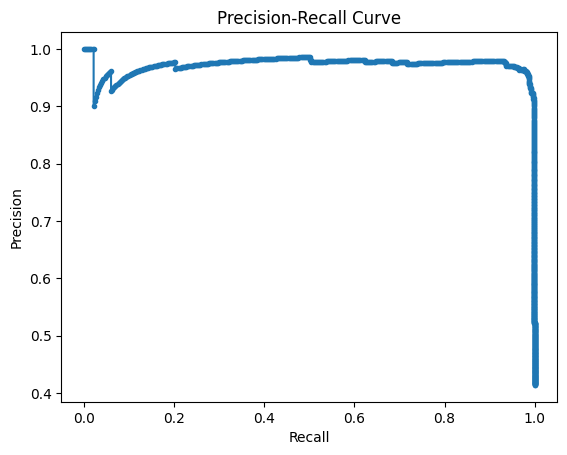

In [62]:
  from sklearn.metrics import precision_recall_curve

  precision, recall, thresholds_pr = precision_recall_curve(y_true, mae_test)

  plt.figure()
  plt.plot(recall, precision, marker='.')
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall Curve')
  plt.show()